# Load all modules and libraries

In [57]:
import pandas as pd
import numpy as np
!pip -q install xlrd

# For maps
!pip -q install folium
import folium
!pip -q install geopy
from geopy.geocoders import Nominatim

# For APIs
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


# For plots
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# For clustering
from sklearn.cluster import KMeans
print("Libraries ready")


Libraries ready


# Wikipedia Source for Lat, Long and Population Data

In [58]:
# Borough Latitude, Longitude and Population Data source
wiki_url = "https://en.wikipedia.org/wiki/List_of_London_boroughs"

# Dataframe 1 : 32 London Boroughs
df_1 = pd.read_html(wiki_url)[0]
df_1

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"North London Business Park, Oakleigh Road South",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,NaN,NaN,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,NaN,NaN,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,NaN,NaN,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,NaN,NaN,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],[note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,264008,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


Remove Redundant columns

In [59]:
df_1.drop(axis=1, columns=['Headquarters', 'Inner', 'Local authority', 'Nr. in map', 'Political control', 'Status'], inplace=True)
df_1.rename(columns={'Population (2013 est)[1]':'Population'}, inplace=True)
df_1.loc[df_1['Borough'].str.contains('note'), 'Borough'] = df_1.loc[df_1['Borough'].str.contains('note'), 'Borough'].str[:-9]
df_1.head()

,Borough,Area (sq mi),Population,Co-ordinates
0,Barking and Dagenham,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E


In [0]:
###################
## Scratch Cell
###################

# Doesn't work
#for idx, v in df_1[df_1.Borough.str.contains("note")].iterrows():  
#    df_1.loc[idx].Borough = df_1.loc[idx].Borough[:-9] #Strip off [note] from borough name
#df_1.Borough

#df_1.loc[df_1['Borough'].str.contains('note'), 'Borough'] = df_1.loc[df_1['Borough'].str.contains('note'), 'Borough'].str.replace(r"\[note..\]", 'gotcha') - Doesn't work
#This works
#df_1.loc[df_1['Borough'].str.contains('note'), 'Borough'] = df_1.loc[df_1['Borough'].str.contains('note'), 'Borough'].str[:-9]
#df_1.Borough


In [60]:
# Dataframe for City of London data
df_city = pd.read_html(wiki_url)[1]

# Remove redundant columns
df_city.drop(axis=1, columns=['Inner', 'Status', 'Local authority', 'Political control', 'Headquarters', 'Nr. inmap'], inplace=True)
df_city.rename(columns={'Population(2011 est)':'Population'}, inplace=True)
df_city.head()

,Borough,Area (sq mi),Population,Co-ordinates
0,City of London,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W


Append City of London Information to Dataframe with rest of the boroughs

In [61]:
df_1 = df_1.append(df_city)
df_1.sort_values(by='Borough', inplace=True)
df_1

,Borough,Area (sq mi),Population,Co-ordinates
0,Barking and Dagenham,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E
1,Barnet,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W
2,Bexley,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E
3,Brent,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W
4,Bromley,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E
5,Camden,8.40,229719,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W
0,City of London,1.12,7000,51°30′56″N 0°05′32″W﻿ / ﻿51.5155°N 0.0922°W
6,Croydon,33.41,372752,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W
7,Ealing,21.44,342494,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W
8,Enfield,31.74,320524,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W


# Data Source 2 : Age information

In [62]:
csv_path = 'https://raw.githubusercontent.com/sharanya-krishnan/Coursera_Capstone/master/London%20Borough%20Median%20Age.xls%20-%20Sheet1%20(1).csv'

df_2 = pd.read_csv(csv_path, header=0)
df_2.sort_values(by='Borough', inplace=True)
df_2.head()

,Borough,Median Age
13,Barking and Dagenham,32.3
14,Barnet,37.0
15,Bexley,38.8
16,Brent,35.3
17,Bromley,40.6


In [63]:
# Merge Borough Lat, Long & Population with Age data
df = pd.merge(left=df_1, right=df_2)
df.head()

,Borough,Area (sq mi),Population,Co-ordinates,Median Age
0,Barking and Dagenham,13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,32.3
1,Barnet,33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,37.0
2,Bexley,23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,38.8
3,Brent,16.70,317264,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,35.3
4,Bromley,57.97,317899,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,40.6


#Clean up Dataframe

Extract Lat & Lng from Co-ordinates

In [64]:
# Extract all the data in Co-ordinates
# that is before the forward-slash
df['Co-ordinates'].replace(r'.* / ', '', regex=True, inplace=True)
df['Co-ordinates'].head()

0    ﻿51.5607°N 0.1557°E
1    ﻿51.6252°N 0.1517°W
2    ﻿51.4549°N 0.1505°E
3    ﻿51.5588°N 0.2817°W
4    ﻿51.4039°N 0.0198°E
Name: Co-ordinates, dtype: object

In [65]:
# Remove the degree symbol
df['Co-ordinates'].replace(r'°', '', regex=True, inplace=True)
df['Co-ordinates'].head()

0    ﻿51.5607N 0.1557E
1    ﻿51.6252N 0.1517W
2    ﻿51.4549N 0.1505E
3    ﻿51.5588N 0.2817W
4    ﻿51.4039N 0.0198E
Name: Co-ordinates, dtype: object

In [66]:
# Use string capture groups to extract the numeric part of the Latitude & Longitude
df['Lat'] = df['Co-ordinates'].str.extract(r'(.*)N') #For the extract funtion, the capture group (string to be captured) is defined as the regexp within the round bracket - In this case (.*N)
df['Long'] = df['Co-ordinates'].str.extract(r'.*N (.*[EW])')
df.head()

,Borough,Area (sq mi),Population,Co-ordinates,Median Age,Lat,Long
0,Barking and Dagenham,13.93,194352,﻿51.5607N 0.1557E,32.3,﻿51.5607,0.1557E
1,Barnet,33.49,369088,﻿51.6252N 0.1517W,37.0,﻿51.6252,0.1517W
2,Bexley,23.38,236687,﻿51.4549N 0.1505E,38.8,﻿51.4549,0.1505E
3,Brent,16.70,317264,﻿51.5588N 0.2817W,35.3,﻿51.5588,0.2817W
4,Bromley,57.97,317899,﻿51.4039N 0.0198E,40.6,﻿51.4039,0.0198E


In [67]:
# Latitude value has some leading character which needs stripping
# Also, Folium maps only work with float values, not with object type. Hence, convert Latitude to float
df['Lat'] = df['Lat'].str[-7:]
df['Lat'] = pd.to_numeric(df.Lat, errors='raise')
df.dtypes

Borough          object
Area (sq mi)    float64
Population        int64
Co-ordinates     object
Median Age      float64
Lat             float64
Long             object
dtype: object

In [68]:
# Map Longitude E/ W to positive/ negative values respectively

# Temp rows
df['Long_EnW'] = df['Long'].str.extract(r'.*([EW])') == 'E'
df['Long_abs'] = df['Long'].str[:6].astype(float)

# Define a function to convert East & West
# Longitude values to Pos & Neg respectively
def Long_posneg_convert(row):
  if(row['Long_EnW'] == True):
    row['Long']  = row['Long_abs']
  else :
    row['Long'] = -(row['Long_abs'])
  return row

# Apply modification to each row of Longitude column
df = df.apply(Long_posneg_convert, axis = 'columns')

# Drop temp rows
df.drop(axis='columns', columns=['Long_abs', 'Long_EnW'], inplace=True)

df.head()


,Borough,Area (sq mi),Population,Co-ordinates,Median Age,Lat,Long
0,Barking and Dagenham,13.93,194352,﻿51.5607N 0.1557E,32.3,51.5607,0.1557
1,Barnet,33.49,369088,﻿51.6252N 0.1517W,37.0,51.6252,-0.1517
2,Bexley,23.38,236687,﻿51.4549N 0.1505E,38.8,51.4549,0.1505
3,Brent,16.70,317264,﻿51.5588N 0.2817W,35.3,51.5588,-0.2817
4,Bromley,57.97,317899,﻿51.4039N 0.0198E,40.6,51.4039,0.0198


#Folium plot of London

In [69]:
# Get Latitude & Longitude of London
address = 'London, United Kingdom'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [70]:
# Draw a map of London with Borough tags
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df['Lat'], df['Long'], df['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

# Venue exploration with Foursquare explore API

In [71]:
# Foursquare Credentials
CLIENT_ID = '0KXFEGYI4ZV1Q1IZZ02C1LZ5RNOYMUFUOL5IFBII4F03HGIL' # your Foursquare ID
CLIENT_SECRET = 'AC0L1B2CSY14CJG4V4F2HV4J5NFFIVMUHFPYFIOK2SNFTUSW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100

print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 0KXFEGYI4ZV1Q1IZZ02C1LZ5RNOYMUFUOL5IFBII4F03HGIL
CLIENT_SECRET:AC0L1B2CSY14CJG4V4F2HV4J5NFFIVMUHFPYFIOK2SNFTUSW


In [0]:
# Define a function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [0]:
#venues = results['response']['groups'][0]['items']
#    
#nearby_venues = json_normalize(venues) # flatten JSON
#
## filter columns
#filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
#nearby_venues =nearby_venues.loc[:, filtered_columns]
#
## filter the category for each row
#nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
#
## clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
#
##Dataframe that contains the different categories of venues listed in the borough
#nearby_venues.shape

In [0]:
#nearby_venues.groupby('categories').count()

In [0]:
#nearby_venues.shape

In [0]:
# Function that parses the dataframe and
# issues Foursquare API request,
# collects JSON response,
# and populates it into a dataframe

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [77]:
all_london_venues = getNearbyVenues(names=df['Borough'], latitudes=df['Lat'], longitudes=df['Long'])

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
City of London
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [78]:
all_london_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station


In [79]:
# Look at only venues that are eateries
all_london_venues['is_eatery'] =  (all_london_venues['Venue Category'].str.contains('Restaurant|Bakery|Caf|Sandwich|Fish and Chips')).astype(int)
all_london_venues.head(30)

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,is_eatery
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park,0
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course,0
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo,0
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket,0
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station,0
5,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center,0
6,Barking and Dagenham,51.5607,0.1557,Dagenham Swimming Pool,51.560946,0.150054,Pool,0
7,Barnet,51.6252,-0.1517,The Atrium,51.624726,-0.151933,Café,1
8,Barnet,51.6252,-0.1517,Beaconsfield Road (BF),51.622827,-0.151466,Bus Stop,0
9,Barnet,51.6252,-0.1517,Oakleigh Cafe,51.623412,-0.154899,Café,1


In [80]:
all_london_venues['is_eatery'].value_counts()

0    1093
1     475
Name: is_eatery, dtype: int64

#Bar chart showing the Top 15 venues in each category

In [81]:
# Create a dataframe that contains the 
# different categories of eateries per Borough

chart_london_eateries=pd.DataFrame(all_london_venues['Venue Category'][all_london_venues.is_eatery == 1].value_counts())
chart_london_eateries.reset_index(inplace=True)
chart_london_eateries.rename(columns={'index' : 'Venue Category', 'Venue Category' : 'Count'}, inplace=True)
chart_london_eateries.head(20)

,Venue Category,Count
0,Café,56
1,Italian Restaurant,48
2,Sandwich Place,39
3,Bakery,34
4,Indian Restaurant,28
5,Fast Food Restaurant,27
6,Restaurant,23
7,Portuguese Restaurant,17
8,French Restaurant,15
9,Sushi Restaurant,14


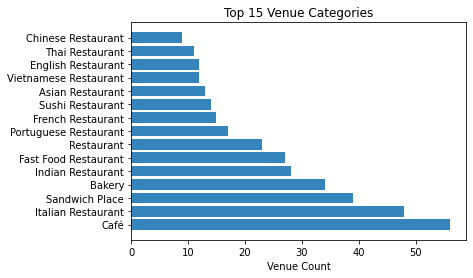

In [82]:
values = chart_london_eateries.loc[0:14]['Venue Category']
y_pos = np.arange(len(values))

Venue_Count = chart_london_eateries.loc[0:14]['Count']

plt.barh(y_pos, Venue_Count, align='center', alpha=0.9)
plt.yticks(y_pos, values)
plt.xlabel('Venue Count')
plt.title('Top 15 Venue Categories')

plt.show()

In [83]:
all_london_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,is_eatery
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park,0
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course,0
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo,0
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket,0
4,Barking and Dagenham,51.5607,0.1557,Becontree Heath Bus Station,51.561065,0.150998,Bus Station,0


# Compute Most commonly occurring category in each Borough

In [84]:
# Extract only Borough name and Category
temp_df = all_london_venues[all_london_venues.is_eatery == 1][['Borough', 'Venue Category']]
temp_df.head()

,Borough,Venue Category
7,Barnet,Café
9,Barnet,Café
10,Bexley,Italian Restaurant
13,Bexley,Italian Restaurant
19,Bexley,Bakery


In [85]:
# Values to fill in the dataframe; mpv_df lists the most frequently occurring eatery category in each borough
data_dict = {'Borough': all_london_venues['Borough'].unique(), 'Most Common Venue Category' : all_london_venues['Borough'].unique()}
mpv_df = pd.DataFrame(data_dict)

for borough in temp_df['Borough'].unique():
  temp1 = pd.DataFrame(temp_df[temp_df['Borough'] == borough]['Venue Category'].T, columns=['Venue Category'])
  popular_venue_category = temp1['Venue Category'].value_counts().idxmax()
  
  row_num = int(mpv_df.index[mpv_df.Borough == borough][0])
  mpv_df.at[row_num, 'Most Common Venue Category'] = popular_venue_category
  
mpv_df
    
  


,Borough,Most Common Venue Category
0,Barking and Dagenham,Barking and Dagenham
1,Barnet,Café
2,Bexley,Fast Food Restaurant
3,Brent,Sandwich Place
4,Bromley,Sushi Restaurant
5,Camden,Café
6,City of London,Restaurant
7,Croydon,Portuguese Restaurant
8,Ealing,Bakery
9,Enfield,Café


In [86]:
# Barking and Dagenham does not have any listed eateries
# In order to include Barking & Dagenham in the study, we will
# mark the most common venue category as the most frequently occuring venue across all Boroughs i.e. Cafe
mpv_df.loc[0]['Most Common Venue Category'] = mpv_df['Most Common Venue Category'].value_counts().idxmax()
mpv_df

,Borough,Most Common Venue Category
0,Barking and Dagenham,Café
1,Barnet,Café
2,Bexley,Fast Food Restaurant
3,Brent,Sandwich Place
4,Bromley,Sushi Restaurant
5,Camden,Café
6,City of London,Restaurant
7,Croydon,Portuguese Restaurant
8,Ealing,Bakery
9,Enfield,Café


In [87]:
# value_counts.idxmax() is used to find the highest value count
# Logic to find second, third and other values in a value counts
idmax_series = mpv_df['Most Common Venue Category'].value_counts()
idmax_series.index[3]

'Bakery'

# Plot a Choropleth map that illustrates density of eateries across boroughs

Count eateries in each borough

In [88]:
all_london_eateries = pd.DataFrame(all_london_venues[['Borough', 'is_eatery']].groupby('Borough').sum())
all_london_eateries.reset_index(inplace=True)
all_london_eateries.rename(columns={'is_eatery':'Number of eateries'}, inplace=True)
all_london_eateries[['Area (sq mi)', 'Population']] = df[['Area (sq mi)', 'Population']]
all_london_eateries[['Latitude', 'Longitude', 'Age']] = df[['Lat', 'Long', 'Median Age']]
all_london_eateries[['Most Common Venue Category']] = mpv_df[['Most Common Venue Category']]
all_london_eateries

,Borough,Number of eateries,Area (sq mi),Population,Latitude,Longitude,Age,Most Common Venue Category
0,Barking and Dagenham,0,13.93,194352,51.5607,0.1557,32.3,Café
1,Barnet,2,33.49,369088,51.6252,-0.1517,37.0,Café
2,Bexley,10,23.38,236687,51.4549,0.1505,38.8,Fast Food Restaurant
3,Brent,17,16.70,317264,51.5588,-0.2817,35.3,Sandwich Place
4,Bromley,8,57.97,317899,51.4039,0.0198,40.6,Sushi Restaurant
5,Camden,23,8.40,229719,51.5290,-0.1255,33.9,Café
6,City of London,31,1.12,7000,51.5155,-0.0922,43.2,Restaurant
7,Croydon,17,33.41,372752,51.3714,-0.0977,37.4,Portuguese Restaurant
8,Ealing,26,21.44,342494,51.5130,-0.3089,36.7,Bakery
9,Enfield,15,31.74,320524,51.6538,-0.0799,36.1,Café


In [89]:
# Plotting Choropleth Map for Venues
# Load GeoJSON file for SFO
!wget --quiet https://raw.githubusercontent.com/sharanya-krishnan/Coursera_Capstone/master/london_boroughs_proper.geojson -O london.geojson
print("Loaded London GEOJSON")

Loaded London GEOJSON


In [0]:
#Read GeoJSON file:
london_geo = r'london.geojson'

#Plain London Map
london_map = folium.Map(location=[latitude, longitude], zoom_start=10)

In [91]:
# generate choropleth map
london_map.choropleth(
    geo_data=london_geo,
    data=all_london_eateries,
    columns=['Borough', 'Number of eateries'],
    key_on='feature.properties.name',
    fill_color='GnBu', 
    #fill_opacity=0.7, 
    #line_opacity=0.2,
    fill_opacity=1.0, 
    line_opacity=0.6,
    legend_name='Eateries in each London Borough'
)

#Add Borough markers

for lat, lng, borough, num in zip(all_london_eateries['Latitude'], all_london_eateries['Longitude'], all_london_eateries['Borough'], all_london_eateries['Number of eateries']):
    label = '{} : {} eateries'.format(borough, num)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='green',
        fill=False,
        #fill_color='#3186cc',
        #fill_opacity=0.7,
        parse_html=False).add_to(london_map) 

#display map
london_map

/usr/local/lib/python3.6/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## Borough Clustering

In [92]:
#Standardize values in order to enable clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

all_eateries_std = pd.DataFrame(scaler.fit_transform(all_london_eateries[['Number of eateries', 'Area (sq mi)', 'Population', 'Age']]),columns = ['Number of eateries', 'Area (sq mi)', 'Population', 'Age'])
all_eateries_std[['Most Common Venue Category']] = mpv_df[['Most Common Venue Category']]
all_eateries_std.head()

,Number of eateries,Area (sq mi),Population,Age,Most Common Venue Category
0,-1.384693,-0.359651,-0.857067,-1.350209,Café
1,-1.192293,1.211143,1.611178,0.349608,Café
2,-0.422696,0.399245,-0.259061,1.000601,Fast Food Restaurant
3,0.250702,-0.137202,0.879134,-0.265220,Sandwich Place
4,-0.615095,3.177046,0.888104,1.651594,Sushi Restaurant


In [93]:
# one-hot encode categorical variables 
all_eateries_clustering_onehot = pd.get_dummies(all_eateries_std[['Most Common Venue Category']], prefix="", prefix_sep="")
all_eateries_clustering_onehot[['Number of eateries', 'Area (sq mi)', 'Population', 'Age']] = all_eateries_std[['Number of eateries', 'Area (sq mi)', 'Population', 'Age']]
all_eateries_clustering_onehot.head()

,Asian Restaurant,Bakery,Café,Caribbean Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Portuguese Restaurant,Restaurant,Sandwich Place,Sushi Restaurant,Vegetarian / Vegan Restaurant,Number of eateries,Area (sq mi),Population,Age
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.384693,-0.359651,-0.857067,-1.350209
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.192293,1.211143,1.611178,0.349608
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-0.422696,0.399245,-0.259061,1.000601
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.250702,-0.137202,0.879134,-0.265220
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.615095,3.177046,0.888104,1.651594


Employ KMeans and find the optimal number of clusters

In [94]:
from sklearn import metrics
kmin = 1
kmax = 8
score_list = []
inertia_list = []
for kclusters in range (kmin, kmax+1):
  #print('Cluster number:', kclusters)
  kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_eateries_clustering_onehot)
  labels = kmeans.labels_
  #print(metrics.silhouette_score(all_eateries_clustering_onehot, labels, metric = 'euclidean'))
  #score_list.append(metrics.silhouette_score(all_eateries_clustering_onehot, labels, metric = 'euclidean') )
  inertia_list.append(kmeans.inertia_)

#print(score_list)
print(inertia_list)


[160.24242424242425, 121.96139053451888, 94.55208228839405, 77.41971570695306, 63.766092754369005, 55.25691547290825, 48.98792187473458, 43.958295612832075]


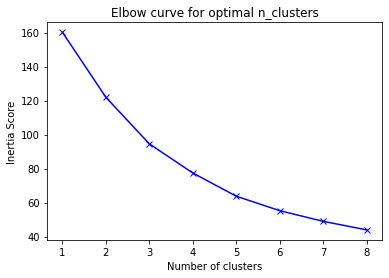

In [95]:
#Plot cluster number vs score
K=range(kmin, kmax+1)
plt.plot(K , inertia_list, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title('Elbow curve for optimal n_clusters')
plt.show()

In [0]:
# Appy KMeans clustering
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_eateries_clustering_onehot)

# check cluster labels generated for each row in the dataframe
labels = kmeans.labels_

In [97]:
all_london_eateries.insert(0, 'Cluster Labels', kmeans.labels_)
all_london_eateries

,Cluster Labels,Borough,Number of eateries,Area (sq mi),Population,Latitude,Longitude,Age,Most Common Venue Category
0,1,Barking and Dagenham,0,13.93,194352,51.5607,0.1557,32.3,Café
1,0,Barnet,2,33.49,369088,51.6252,-0.1517,37.0,Café
2,0,Bexley,10,23.38,236687,51.4549,0.1505,38.8,Fast Food Restaurant
3,1,Brent,17,16.70,317264,51.5588,-0.2817,35.3,Sandwich Place
4,0,Bromley,8,57.97,317899,51.4039,0.0198,40.6,Sushi Restaurant
5,1,Camden,23,8.40,229719,51.5290,-0.1255,33.9,Café
6,2,City of London,31,1.12,7000,51.5155,-0.0922,43.2,Restaurant
7,0,Croydon,17,33.41,372752,51.3714,-0.0977,37.4,Portuguese Restaurant
8,1,Ealing,26,21.44,342494,51.5130,-0.3089,36.7,Bakery
9,0,Enfield,15,31.74,320524,51.6538,-0.0799,36.1,Café


Print Cluster statistics

In [98]:
#all_london_eateries['Borough', all_london_eateries['Cluster Labels' == 0]
#all_london_venues['Venue Category'][all_london_venues.is_eatery == 1].value_counts()
print("Cluster 0 Mean number of eateries: ", all_london_eateries['Number of eateries'][all_london_eateries['Cluster Labels'] == 0].mean())
print("Cluster 0 Mean Age: ", all_london_eateries['Age'][all_london_eateries['Cluster Labels'] == 0].mean())
print("Cluster 0 Mean Population: ", all_london_eateries['Population'][all_london_eateries['Cluster Labels'] == 0].mean())
print("Cluster 0 Total Population: ", all_london_eateries['Population'][all_london_eateries['Cluster Labels'] == 0].sum())
print("Cluster 0 Common Eatery category: ", all_london_eateries['Most Common Venue Category'][all_london_eateries['Cluster Labels'] == 0].mode())

                    
      

Cluster 0 Mean number of eateries:  9.083333333333334
Cluster 0 Mean Age:  38.0
Cluster 0 Mean Population:  270176.4166666667
Cluster 0 Total Population:  3242117
Cluster 0 Common Eatery category:  0    Café
dtype: object


In [99]:
print("Cluster 1 Mean number of eateries: ", all_london_eateries['Number of eateries'][all_london_eateries['Cluster Labels'] == 1].mean())
print("Cluster 1 Mean Age: ", all_london_eateries['Age'][all_london_eateries['Cluster Labels'] == 1].mean())
print("Cluster 1 Mean Population: ", all_london_eateries['Population'][all_london_eateries['Cluster Labels'] == 1].mean())
print("Cluster 1 Total Population: ", all_london_eateries['Population'][all_london_eateries['Cluster Labels'] == 1].sum())
print("Cluster 1 Common Eatery category: ", all_london_eateries['Most Common Venue Category'][all_london_eateries['Cluster Labels'] == 1].mode())

Cluster 1 Mean number of eateries:  14.411764705882353
Cluster 1 Mean Age:  34.029411764705884
Cluster 1 Mean Population:  274452.82352941175
Cluster 1 Total Population:  4665698
Cluster 1 Common Eatery category:  0                    Café
1    Fast Food Restaurant
dtype: object


In [100]:
print("Cluster 2 Mean number of eateries: ", all_london_eateries['Number of eateries'][all_london_eateries['Cluster Labels'] == 2].mean())
print("Cluster 2 Mean Age: ", all_london_eateries['Age'][all_london_eateries['Cluster Labels'] == 2].mean())
print("Cluster 2 Mean Population: ", all_london_eateries['Population'][all_london_eateries['Cluster Labels'] == 2].mean())
print("Cluster 2 Total Population: ", all_london_eateries['Population'][all_london_eateries['Cluster Labels'] == 2].sum())
print("Cluster 2 Common Eatery category: ", all_london_eateries['Most Common Venue Category'][all_london_eateries['Cluster Labels'] == 2])

Cluster 2 Mean number of eateries:  30.25
Cluster 2 Mean Age:  38.650000000000006
Cluster 2 Mean Population:  127018.0
Cluster 2 Total Population:  508072
Cluster 2 Common Eatery category:  6     Restaurant
12          Café
19          Café
20          Café
Name: Most Common Venue Category, dtype: object


In [101]:
all_eateries_std.insert(0, 'Borough', all_london_eateries['Borough'] )
all_eateries_std.head()

,Borough,Number of eateries,Area (sq mi),Population,Age,Most Common Venue Category
0,Barking and Dagenham,-1.384693,-0.359651,-0.857067,-1.350209,Café
1,Barnet,-1.192293,1.211143,1.611178,0.349608,Café
2,Bexley,-0.422696,0.399245,-0.259061,1.000601,Fast Food Restaurant
3,Brent,0.250702,-0.137202,0.879134,-0.265220,Sandwich Place
4,Bromley,-0.615095,3.177046,0.888104,1.651594,Sushi Restaurant


In [102]:
all_eateries_std[['Latitude', 'Longitude', 'Cluster Labels']] = all_london_eateries[['Latitude', 'Longitude', 'Cluster Labels']]
all_eateries_std.shape

(33, 9)

In [103]:
all_eateries_std['Cluster Labels'].value_counts()

1    17
0    12
2     4
Name: Cluster Labels, dtype: int64

In [104]:
all_eateries_std

,Borough,Number of eateries,Area (sq mi),Population,Age,Most Common Venue Category,Latitude,Longitude,Cluster Labels
0,Barking and Dagenham,-1.384693,-0.359651,-0.857067,-1.350209,Café,51.5607,0.1557,1
1,Barnet,-1.192293,1.211143,1.611178,0.349608,Café,51.6252,-0.1517,0
2,Bexley,-0.422696,0.399245,-0.259061,1.000601,Fast Food Restaurant,51.4549,0.1505,0
3,Brent,0.250702,-0.137202,0.879134,-0.265220,Sandwich Place,51.5588,-0.2817,1
4,Bromley,-0.615095,3.177046,0.888104,1.651594,Sushi Restaurant,51.4039,0.0198,0
5,Camden,0.827900,-0.803746,-0.357488,-0.771548,Café,51.5290,-0.1255,1
6,City of London,1.597498,-1.388377,-3.503519,2.591918,Restaurant,51.5155,-0.0922,2
7,Croydon,0.250702,1.204719,1.662934,0.494273,Portuguese Restaurant,51.3714,-0.0977,0
8,Ealing,1.116499,0.243450,1.235522,0.241109,Bakery,51.5130,-0.3089,1
9,Enfield,0.058303,1.070607,0.925184,0.024111,Café,51.6538,-0.0799,0


# Folium plot of London representing clusters

In [105]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_eateries_std['Latitude'], all_eateries_std['Longitude'], all_eateries_std['Borough'], all_eateries_std['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
             
map_clusters